# Import libraries and Load Dataset

In [2]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Dataset\pet_supplies_2212.csv")

# Data Exploration and Cleaning

In [4]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [5]:
df.tail()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [7]:
# Shape of the data
df.shape

(1500, 8)

In [8]:
# Check for missing values
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [9]:
# check columns
df.columns

Index(['product_id', 'category', 'animal', 'size', 'price', 'sales', 'rating',
       'repeat_purchase'],
      dtype='object')

In [10]:
# check the data types
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

**Observations**
- The missing values for rating by using the ffill method to replace the null values in rating, and replace the null values with 0 respectively.
- Treat 'unlisted' in the price column as a missing value, and it will be replaced with the overall median price.
- Treat 'N/A' in the rating column as a missing value, and it will be replaced with 0.
- Replace the missing value in Category with unknown.
- Convert rating to int.
- Convert price and sales to 2-decimal places


In [11]:
# check the columns that categorical and numerical 
numerical_cols = df.select_dtypes(include=['int64', 'float']).columns.tolist()
numerical_cols

['product_id', 'sales', 'rating', 'repeat_purchase']

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['category', 'animal', 'size', 'price']

## Manipulation and Validation of Categorical columns


In [13]:
# Replace "-" with "unknown"
df['category'] = df['category'].replace('-', 'unknown')

# Count the number of occurrences of "unknown" in the column
num_unknown = (df['category'] == 'unknown').sum()
print(f"{num_unknown} occurrences of 'unknown' found")


25 occurrences of 'unknown' found


In [14]:
## Manipulation & validation of categorical columns
df['rating'].fillna(0, inplace=True)

In [15]:
# Replace "unlisted" with NaN in the 'price' column
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Standardize casing in the 'size' column
df['size'] = df['size'].str.lower()


## Manipulation and Validation of numerical columns


In [16]:
# Calculate the median price value
median_price = df['price'].median()

# Replace missing values with median price value
df['price'].fillna(median_price, inplace=True)

In [17]:
df[df['rating'] == 0].head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,28.065,542.06,0.0,0
44,45,Medicine,Bird,medium,28.065,1209.41,0.0,0
46,47,Toys,Cat,small,28.065,1367.47,0.0,1
70,71,Equipment,Dog,large,28.065,1446.43,0.0,0
73,74,Food,Bird,large,28.065,1864.01,0.0,0


In [18]:
# Round sales and prices to 2 decimal places
df['sales'] = df['sales'].apply(lambda x: round(x, 2))
df['price'] = df['price'].apply(lambda x: round(x, 2))


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


# Exploratory Data Analysis


In [20]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1


# Univariates Analysis

In [21]:
# Calculate summary satistics for all numerical column
df.describe().astype('int')

,product_id,price,sales,rating,repeat_purchase
count,1500,1500,1500,1500,1500
mean,750,29,996,4,0
std,433,7,323,2,0
min,1,12,286,0,0
25%,375,25,747,3,0
50%,750,28,1000,5,1
75%,1125,33,1158,6,1
max,1500,54,2255,9,1


 **Observations** 
 - product_id: Ranges from 1 to 1500, which matches our dataset size, indicating unique product identifiers.
 - price: The average price of the products is approximately $29. Prices range from $12 to $54.
 - sales: The average sales value is around $996, with a minimum value of $286 and a maximum value of $2255.
 - rating: Product ratings range from 1 to 9, with an average rating of approximately 4.
 - repeat_purchase: This is a binary column with values of either 0 (not a repeat purchase) or 1 (repeat purchase). .

In [22]:
# count of repeat purchases
df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

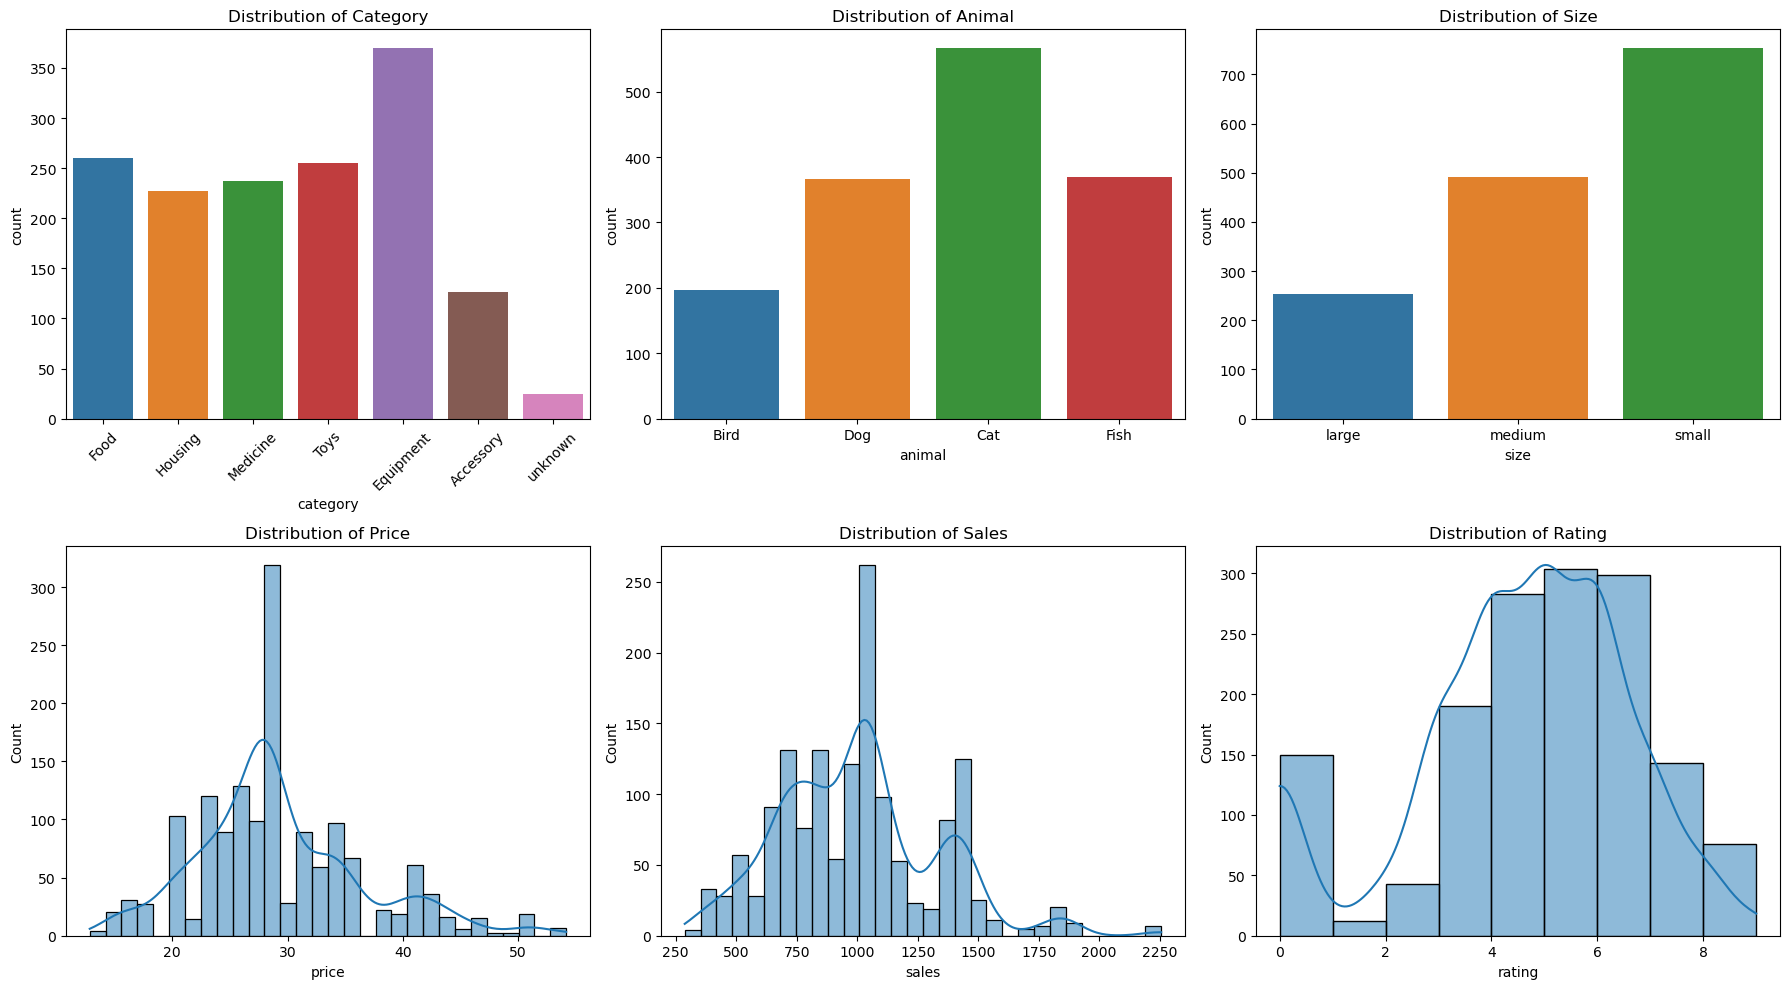

In [23]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Univariate analysis for categorical variables
sns.countplot(data=df, x='category', ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Category')
ax[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='animal', ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Animal')

sns.countplot(data=df, x='size', ax=ax[0, 2])
ax[0, 2].set_title('Distribution of Size')

# Univariate analysis for continuous variables
sns.histplot(data=df, x='price', bins=30, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of Price')

sns.histplot(data=df, x='sales', bins=30, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Distribution of Sales')

sns.histplot(data=df, x='rating', bins=9, ax=ax[1, 2], kde=True)
ax[1, 2].set_title('Distribution of Rating')

plt.tight_layout()
plt.show()

**Observations**
 - Category:The majority of products fall under the "Food" category, followed by "Housing" and "Medicine".
 - The "Unknown" category has the least number of products.
 - Animal:The products are mostly targeted towards "Dogs" and "Cats", with fewer products for "Birds" and "Fish".
 - Size:"Medium" sized products are the most common, followed by "Small" and "Large".
- price: The distribution is slightly right-skewed with a concentration of products in the $25 to $30 range..
- Sales: The distribution is approximately normal with a peak around 1000.
- Rating: Most products have ratings between 4 and 6, with fewer products having very low or very high ratings.

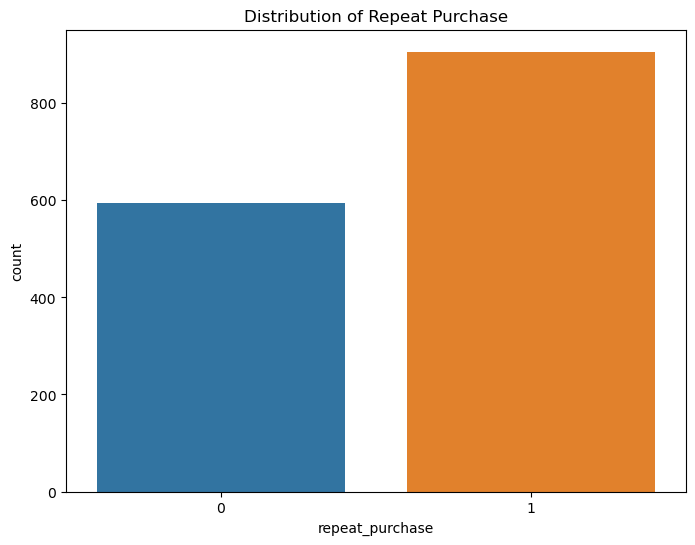

In [24]:
#  binary variable repeat_purchase
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='repeat_purchase')
plt.title('Distribution of Repeat Purchase')
plt.show()


-  The chart shows 906 was purchased multiple times, as indicated by the value of 1 in the 'repeat_purchase' column. On the other hand, 594 was purchased once, as indicated by the value of 0 in the same column.

In [25]:
# Count the number of unique product_id
df['product_id'].nunique()

1500

In [26]:
# Count of products in each category
category_counts = df['category'].value_counts()

print(category_counts)

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
unknown       25
Name: category, dtype: int64


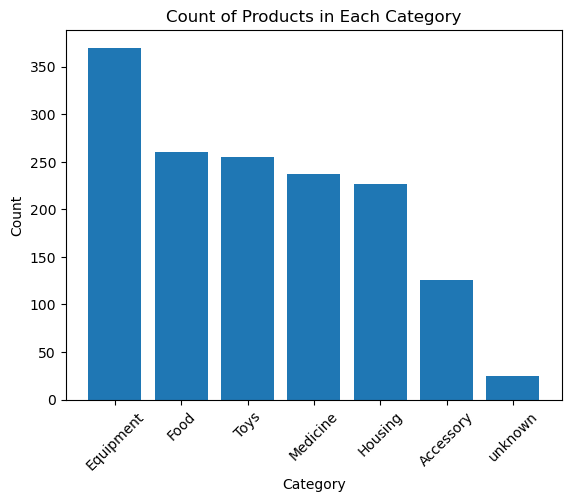

In [27]:
category_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)

# Set chart title and axis labels
plt.title('Count of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

- Equipment came first in all categories with 370, followed by food with 260 products. Accessories and unknown products came last with 126 and 25, respectively.

In [28]:
# count of products for each animal category
animal_counts = df['animal'].value_counts()

print(animal_counts)

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64


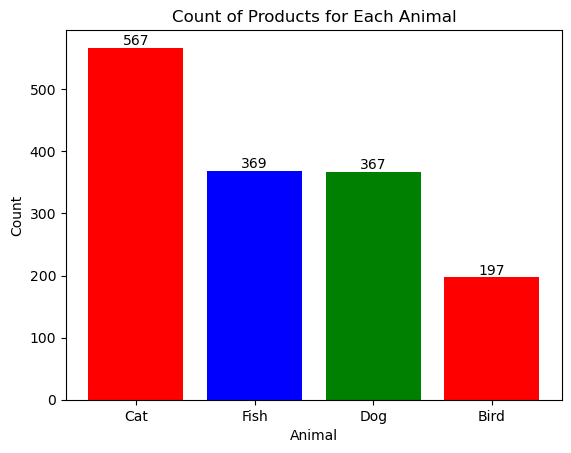

In [29]:
# Create a bar chart
plt.bar(animal_counts.index, animal_counts.values, color=['red', 'blue', 'green'])

# Add text labels to the bars
for i, count in enumerate(animal_counts.values):
    plt.text(i, count+5, str(count), ha='center')

# Set chart title and axis labels
plt.title('Count of Products for Each Animal')
plt.xlabel('Animal')
plt.ylabel('Count')

# Display the chart
plt.show()


- Cats had the highest count with 567 products, followed by fish with 369 products and dogs with 367 products. Birds had the lowest count with 197.

# Bivariates Analysis


In [ ]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.1,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


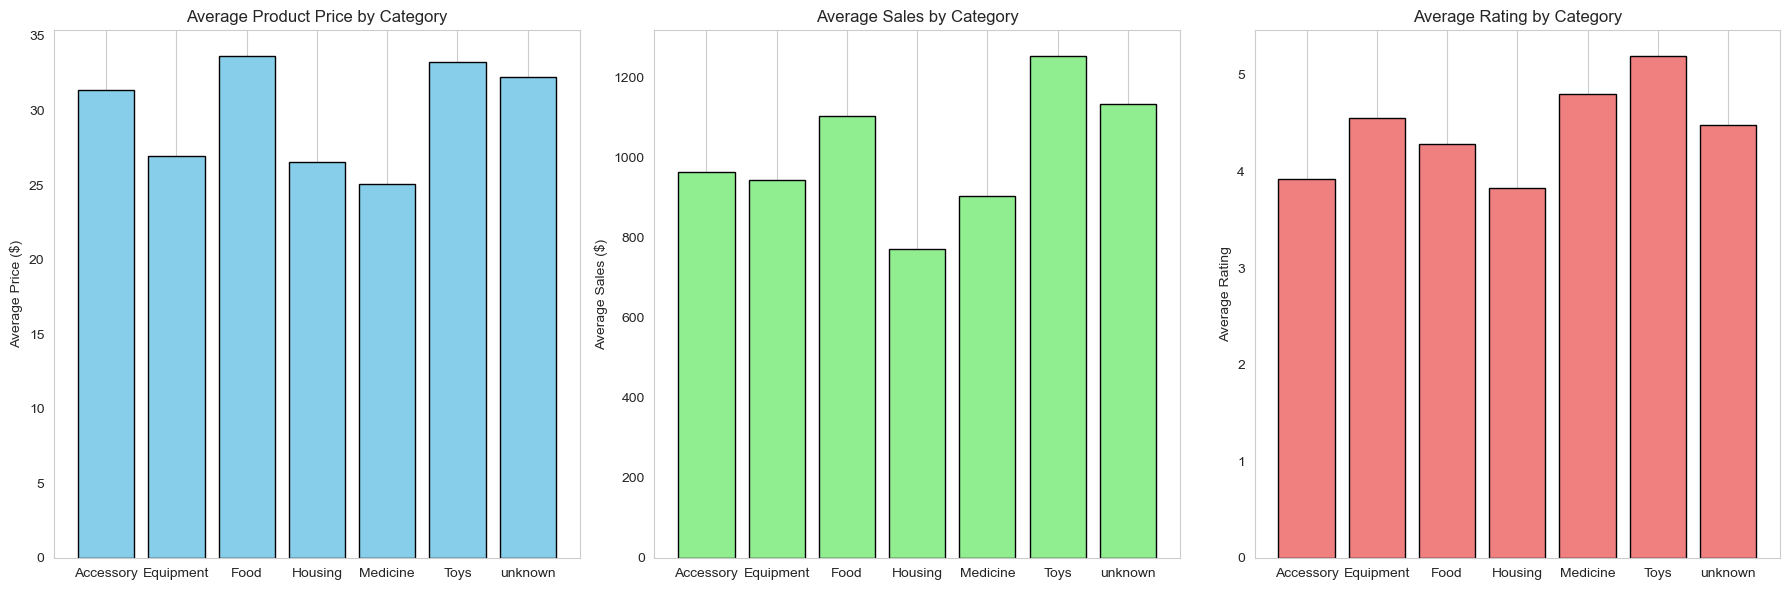

In [ ]:
# Group by category and calculate average values
avg_by_category = df.groupby('category').agg({
    'price': 'mean',
    'sales': 'mean',
    'rating': 'mean'
}).reset_index()

# Plot bivariate analysis by category
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Average product price by category
axes[0].bar(avg_by_category['category'], avg_by_category['price'], color='skyblue', edgecolor='black')
axes[0].set_title('Average Product Price by Category')
axes[0].set_ylabel('Average Price ($)')
axes[0].grid(axis='y')

# Average sales by category
axes[1].bar(avg_by_category['category'], avg_by_category['sales'], color='lightgreen', edgecolor='black')
axes[1].set_title('Average Sales by Category')
axes[1].set_ylabel('Average Sales ($)')
axes[1].grid(axis='y')

# Average rating by category
axes[2].bar(avg_by_category['category'], avg_by_category['rating'], color='lightcoral', edgecolor='black')
axes[2].set_title('Average Rating by Category')
axes[2].set_ylabel('Average Rating')
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()

**Observation**
- Average Product Price: "Medicine" and "Toys" has the highest average price, followed by "Unknown" and the least average price in all categories is   "Medicine".
- Average Sales: "Toys" products the highest sales on average, followed closely by "Unknown" and "food".
- Average Rating: Ratings are fairly consistent across categories, with "Accessory" and "Housing" having a slightly lower average rating.

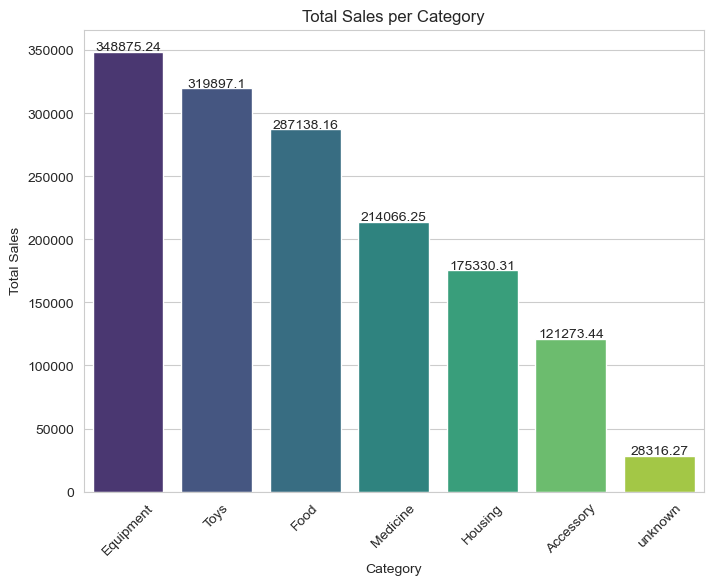

In [ ]:
# Calculate total sales per category
sales_per_category = df.groupby('category')['sales'].sum().sort_values(ascending=False)

# Plot total sales per category
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette='viridis')

# Add text labels to the bars
for i, sales in enumerate(sales_per_category.values):
    plt.text(i, sales+1000, str(sales), ha='center')

plt.title('Total Sales per Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


**Observation**
- The Equipment category has total sales of 348875.24, followed by Toys with 319897.1 and Food has the total sales of 287138.16
- The Unknown category, which is where we placed the unspecified entries, has relatively lower sales with 28316.27.

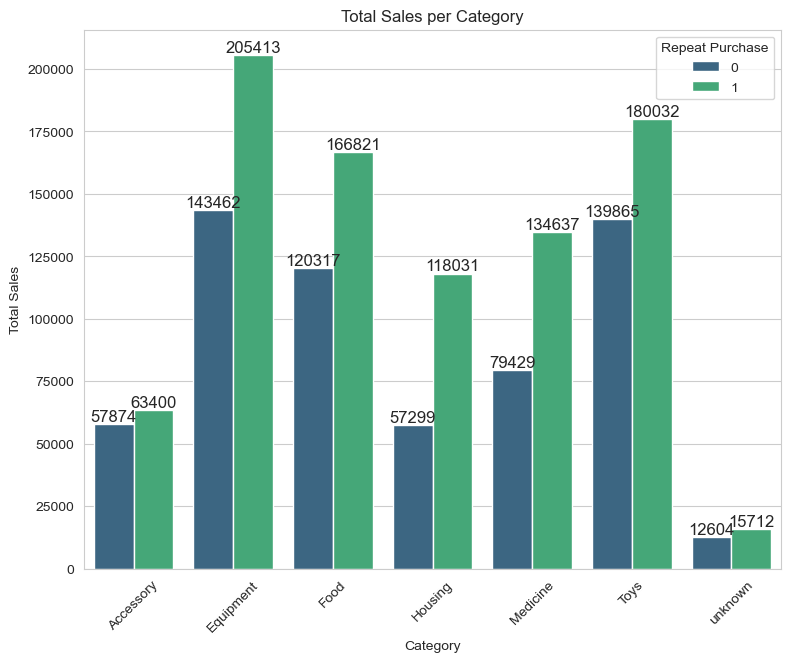

In [ ]:
# use sales_per_category to group by repeat_purchase 
rp = df.groupby(['repeat_purchase', 'category'])['sales'].sum() 
rp

rp_reset = rp.reset_index()

# plot rp with the best chart type
plt.figure(figsize=(9, 7))
ax = sns.barplot(x='category', y='sales', hue='repeat_purchase', data=rp_reset, palette='viridis')

# Add total numbers to each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
            '{:.0f}'.format(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.title('Total Sales per Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Repeat Purchase')
plt.show()

- Repeat purchases are essential for driving sales, and chart shows that equipment was the most popular category with a total of 205,413 repeat purchases. Toys were the second most popular category with 180,032 repeat purchases, followed by food with 166,821 repeat purchases. The 'unknown' category had the fewest repeat purchases with a total of 15,712.

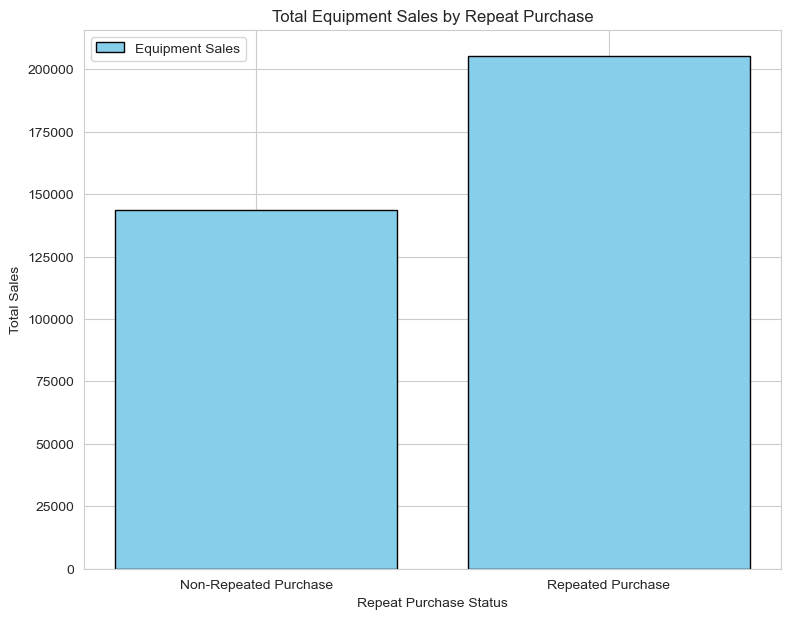

In [ ]:
# # calculate the total sales for equipment, group by repeat_purchase
# equipment_rp = df[df['category'] == 'equipment'].groupby('repeat_purchase')['sales'].sum()
# equipment_rp

# # plot the bar chart
# plt.figure(figsize=(9, 7))
# plt.bar(equipment_rp.index, equipment_rp.values, color='skyblue', edgecolor='black', label='Equipment')
# plt.title('Total Sales by Category')
# plt.ylabel('Total Sales')
# plt.xlabel('Category')
# plt.legend(title='Repeat Purchase')
# plt.show()

# Convert the 'repeat_purchase' column to integer
df['repeat_purchase'] = df['repeat_purchase'].astype(int)

# Recalculate the total sales for equipment, grouped by repeat_purchase
equipment_rp = df[df['category'] == 'Equipment'].groupby('repeat_purchase')['sales'].sum()

# Check if the resulting Series is empty
if not equipment_rp.empty:
    # plot the bar chart
    plt.figure(figsize=(9, 7))
    bars = plt.bar(equipment_rp.index, equipment_rp.values, color='skyblue', edgecolor='black', label='Equipment Sales')
    
    # Set the x-axis tick labels
    plt.xticks(equipment_rp.index, ['Non-Repeated Purchase', 'Repeated Purchase'])
    
    plt.title('Total Equipment Sales by Repeat Purchase')
    plt.ylabel('Total Sales')
    plt.xlabel('Repeat Purchase Status')
    plt.legend()
    plt.show()
else:
    print("No data available for equipment sales grouped by repeat_purchase.")

- Equipment had repeat purchases with a total of 205,413 sales, while non-repeat purchases had a total of 143,462 sales.

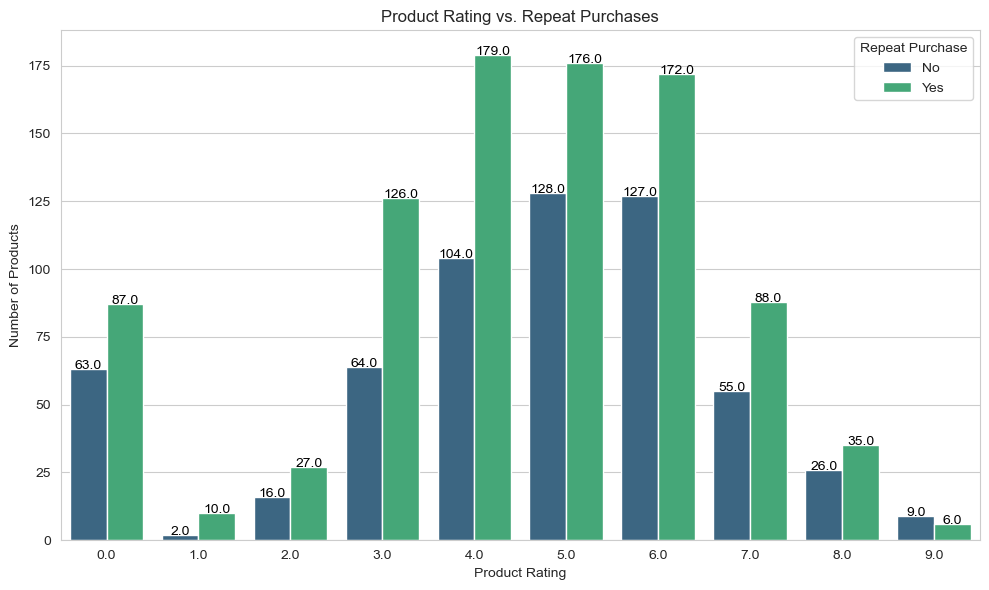

In [ ]:
# Plot the relationship between product rating and repeat purchases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='repeat_purchase', palette='viridis')

# Add text labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), ha='center', color='black')

plt.title('Product Rating vs. Repeat Purchases')
plt.ylabel('Number of Products')
plt.xlabel('Product Rating')
plt.legend(title='Repeat Purchase', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


**Observation**
- Our main objective is to increase sales by encouraging repeated purchases. According to the chart, we can see that 179 products received a rating of 4.0, 176 products received a rating of 5.0, and 172 products received a rating of 6.0. These high ratings suggest that customers are satisfied with these products and may be more likely to make repeat purchases.

 

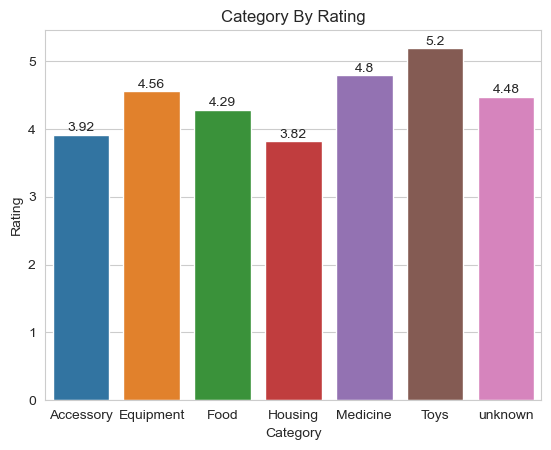

In [ ]:
## What are the product with higher ratings are more likely to have repeat purchases?
# Calculate the rating of each category
rating_by_category = df.groupby('category')['rating'].mean()

# Plot a bar chart to visualize the rating of each category
sns.barplot(x=rating_by_category.index, y=rating_by_category.values)

# Add text labels to the bars
for i, rating in enumerate(rating_by_category.values):
    plt.text(i, rating+0.05, str(round(rating, 2)), ha='center')

plt.title('Category By Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

- Product ratings are an important indicator of customer satisfaction, and the chart shows that toys had the highest rating with 5.2 out of 10. Medicine had a rating of 4.8, equipment had a rating of 4.56, and housing had the lowest rating with 3.82.

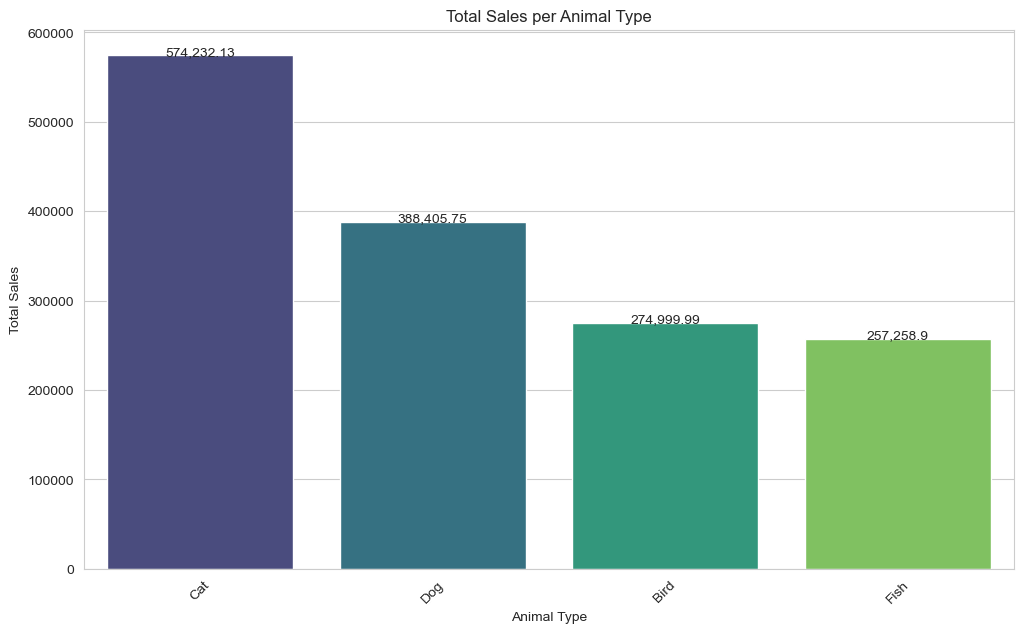

In [ ]:
# Calculate total sales per animal type
sales_per_category = df.groupby('animal')['sales'].sum().sort_values(ascending=False)

# Plot total sales per category
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette='viridis')

# Add text labels to the bars
for i, sales in enumerate(sales_per_category.values):
    plt.text(i, sales, f"{sales:,}", ha='center')

plt.title('Total Sales per Animal Type')
plt.ylabel('Total Sales')
plt.xlabel('Animal Type')
plt.xticks(rotation=45)
plt.show()

- Cat products emerged as the top-selling with a total sales revenue of 544,232.13. Following closely behind, Dog products generated a significant total sales revenue of 388,405.75. Bird products also performed well, accumulating a total sales revenue of 249,999.99. Fish products rounded out the list with a respectable total sales revenue of 257,258.90. These results indicate strong market demand for our Cat and Dog products, while Bird and Fish products also show potential for further growth.

# Multivariates Analysis

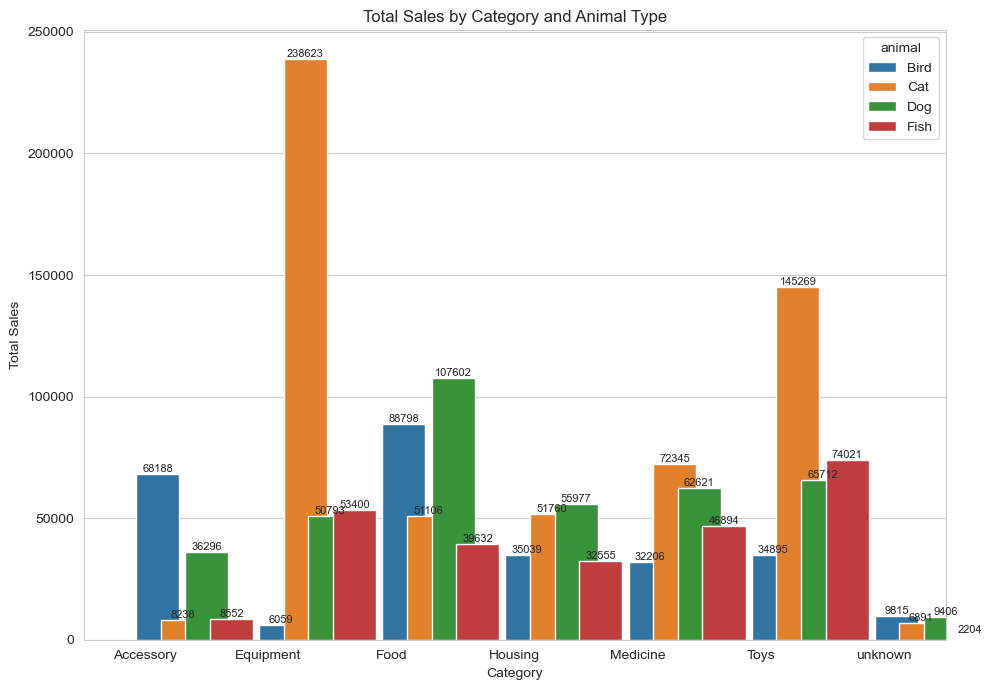

In [ ]:
# Plot the total sales by category and animal using a bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=sales_by_category_animal, x='category', y='sales', hue='animal', dodge=True)

# Adjust the width of the bars to add space between them
bar_width = 0.35
for bar in ax.patches:
    x = bar.get_x()
    bar.set_width(bar_width)
    bar.set_x(x + (1 - bar_width) / 2)

# Add numbers to the bars with reduced font size
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.0f}'.format(p.get_height()),
            fontsize=8, ha='center', va='bottom')

plt.title('Total Sales by Category and Animal Type')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

- The total sales for Equipment for Cat were 238623. Toys for Cat had total sales of 145269, and Dog Food had total sales of 107602.

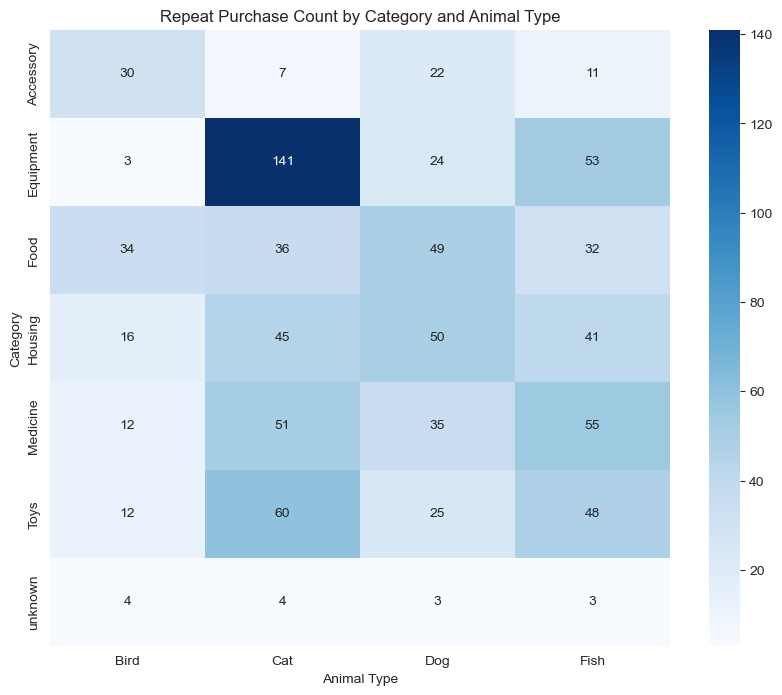

In [ ]:
# Calculate the repeat purchase count by category and animal type
repeat_purchase_count = df.groupby(['category', 'animal'])['repeat_purchase'].sum().unstack()

# Create a heatmap to visualize the repeat purchase count by category and animal type
plt.figure(figsize=(10, 8))
sns.heatmap(repeat_purchase_count, cmap='Blues', annot=True, fmt='g')
plt.title('Repeat Purchase Count by Category and Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Category')
plt.show()

- The highest repeat purchase count was for Equipment for Cat, with 141 purchases. Toys for Cat had a repeat purchase count of 60, and Fish medicine had a repeat purchase count of 55.

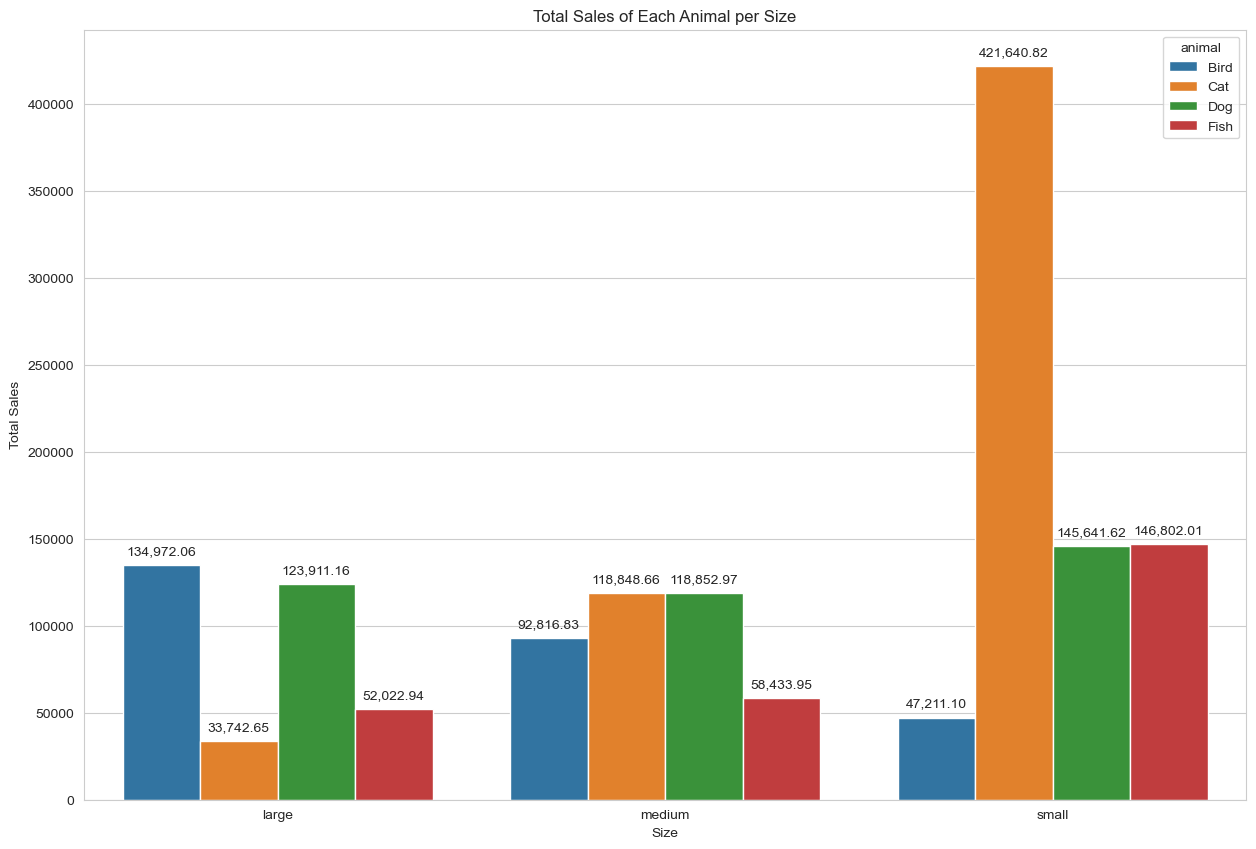

In [ ]:
# Group the data by animal and size, and calculate the total sales for each group
sales_by_animal_and_size = df.groupby(['animal', 'size'])['sales'].sum().reset_index()

# Plot a bar chart to visualize the total sales of each animal per size
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=sales_by_animal_and_size, x='size', y='sales', hue='animal')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Sales of Each Animal per Size')
plt.xlabel('Size')
plt.ylabel('Total Sales')

plt.show()

- The total sales for small size Cat were 421640.82, while small size Dog and Fish had total sales of 145641.62 and 146802.01, respectively.

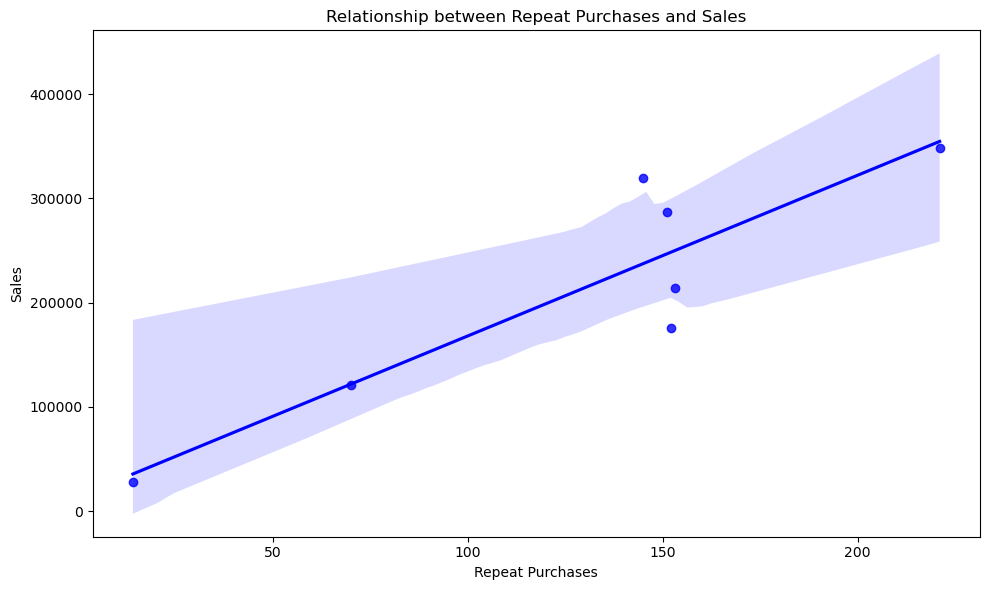

In [42]:
# Calculate the total sales for each category
category_sales = df.groupby('category')['sales'].sum()

# Calculate the total number of repeat purchases for each category
category_repeat_purchases = df.groupby('category')['repeat_purchase'].sum()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=category_repeat_purchases, y=category_sales, color='blue')
plt.title('Relationship between Repeat Purchases and Sales')
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()



- The chart shows a clear correlation between repeat purchases and sales in all categories: the greater the number of repeat purchases, the greater the sales. 

**Insights:**
- The Housing and Accessory category had a low rating, which is why sales were affected."
- The total sales for Cat Equipment were 238,623. Toys for Cat had total sales of 145,269, and Dog Food had total sales of 107,602."
- Large and medium-sized animals were not in as much demand as small-sized ones."
- The ratings for Food and Equipment are slightly strong, but there is room for improvement. 


**Recommendations**

- Results from the analysis suggest that customers are more likely to make repeat purchases for equipment and toys, possibly due to their durability and usefulness. By focusing on promoting these categories and improving customer satisfaction, we can potentially increase our sales and improve customer loyalty.
- Considering these ratings in category, focus on promoting toys and medicine, as they have received positive feedback from customers. This can include targeted marketing campaigns, offering discounts or special promotions on these products, and ensuring their availability and quality. It is critical to address the low rating in the housing category by identifying and correcting any issues that may have contributed to consumer discontent. Customer surveys and feedback sessions can provide useful insights into areas for improvement. The company can improve the housing category's rating and increase customer happiness by upgrading its products and addressing customer issues.
- Overall, the company can improve consumer satisfaction by leveraging the favorable ratings of toys and medicine and actively addressing housing-related problems.
